In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
%gui qt

In [2]:
from spiketag.base import mua_kernel as kernel

/disk0/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/disk0/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


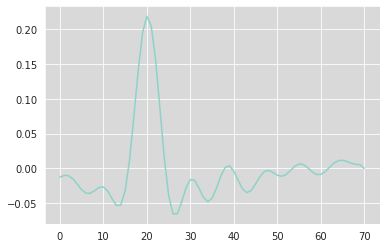

In [3]:
plot(kernel)

In [4]:
from numpy.fft import fft, ifft

In [5]:
from spiketag.base import bload

In [6]:
bf = bload(nCh=3, fs=25000.)

In [8]:
folder = '/disk0/Work/pydev/spiketag/demo/GT/'
bf.load(folder+'cell_0109_mua_25000Hz.bin', dtype='float32')

2019-10-17 16:53:04,331 - spiketag - INFO - #############  load data  ###################
2019-10-17 16:53:04,333 - spiketag - INFO - /disk0/Work/pydev/spiketag/demo/GT/cell_0109_mua_25000Hz.bin loaded, it contains: 
2019-10-17 16:53:04,333 - spiketag - INFO - 11600119.0 * 3 points (139201428 bytes) 
2019-10-17 16:53:04,334 - spiketag - INFO - 3 channels with sampling rate of 25000.0000 
2019-10-17 16:53:04,335 - spiketag - INFO - 464.005 secs (7.733 mins) of data
2019-10-17 16:53:04,336 - spiketag - INFO - #############################################


In [9]:
bf.show()

In [11]:
data = bf.data.numpy().reshape(-1,3)

In [12]:
x = data[:,2]

In [13]:
x.shape

(11600119,)

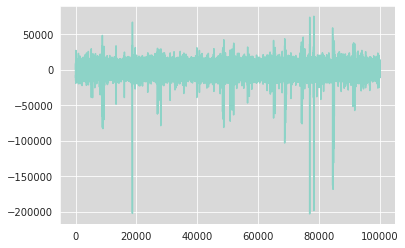

In [14]:
plot(x[:100000])

In [15]:
from spiketag.base.Binload import _deconvolve

In [16]:
y = _deconvolve(x, kernel)

In [18]:
y.shape

torch.Size([11600049])

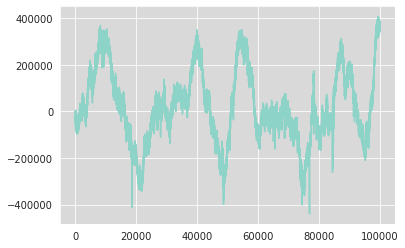

In [19]:
plot(y[:100000])

In [7]:
bf2 = bload(nCh=3, fs=20000.)

In [10]:
bf2.load('./cell_0109_raw.bin', dtype=np.int32)

ValueError: Size of available data is not a multiple of the data-type size.

In [20]:
%gui qt

In [21]:
bf2.resample(25000.)

In [22]:
raw_data = bf2.data.numpy().reshape(-1,3)

In [23]:
raw_x = raw_data[:,2]

In [24]:
raw_x.shape

(11600049,)

In [25]:
uu = np.vstack((y, raw_x)).T
uu

array([[-5.78660011e+00,  0.00000000e+00],
       [-1.22229042e+01, -6.96778419e+00],
       [ 3.31405373e+01,  3.83228130e+01],
       ...,
       [-3.71196133e+04, -3.71140372e+04],
       [-3.28710625e+04, -3.28653919e+04],
       [-2.95166582e+04, -2.95113722e+04]])

In [26]:
from spiketag.view import wave_view

In [30]:
wview = wave_view(data=uu)

In [31]:
wview.show()

In [ ]:
wview.show()

In [106]:
def fft(x):
    fx = rfft(torch.from_numpy(x), 1, onesided=False)
    return fx[:,0].numpy() + fx[:,1].numpy()*1j

In [174]:
pp = fft(x)
pp

array([2592046.19618566      +0.        j,
       1949441.08052257 -658612.05064485j,
       4254707.45143443+1419376.36441671j, ...,
       2084225.34648515 +225373.77799279j,
       4254707.45143442-1419376.36441674j,
       1949441.08052257 +658612.05064483j])

In [177]:
np.vstack((pp.real, pp.imag)).T

array([[ 2592046.19618566,        0.        ],
       [ 1949441.08052257,  -658612.05064485],
       [ 4254707.45143443,  1419376.36441671],
       ...,
       [ 2084225.34648515,   225373.77799279],
       [ 4254707.45143442, -1419376.36441674],
       [ 1949441.08052257,   658612.05064483]])

In [142]:
x

(100000,)

In [163]:
y = rfft(torch.from_numpy(x), 1, onesided=False)

In [172]:
y

tensor([[ 2.5920e+06,  0.0000e+00],
        [ 1.9494e+06, -6.5861e+05],
        [ 4.2547e+06,  1.4194e+06],
        ...,
        [ 2.0842e+06,  2.2537e+05],
        [ 4.2547e+06, -1.4194e+06],
        [ 1.9494e+06,  6.5861e+05]])

In [165]:
irfft(y, 1, onesided=False).numpy()

array([ 0.0000000e+00,  8.7679997e-02, -4.1856000e-01, ...,
       -3.0944702e+02,  4.2470558e+01, -2.2157039e+02], dtype=float32)

In [166]:
x

array([ 0.0000000e+00,  8.8957697e-02, -4.1913661e-01, ...,
       -3.0944434e+02,  4.2470356e+01, -2.2156749e+02], dtype=float32)

In [147]:
from numpy.fft import fft, ifft

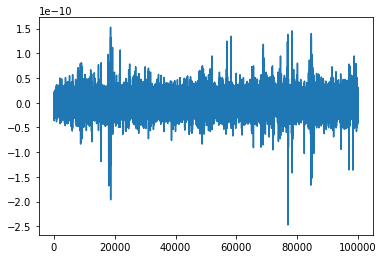

In [153]:
plot(ifft(fft(x)).real - x)

In [ ]:
plot(ifft(fft(x)).real - x)

In [117]:
HH = fft(x)

In [122]:
HH

array([2592047.5      +0.  j, 1949441.  -658611.75j,
       4254708. +1419376.5 j, ..., 2084225.8 +225373.94j,
       4254708. -1419376.5 j, 1949441.  +658611.75j], dtype=complex64)

In [159]:
irfft(torch.from_numpy(HH), 1, onesided=False)

TypeError: can't convert np.ndarray of type numpy.complex64. The only supported types are: double, float, float16, int64, int32, and uint8.

In [120]:
np.fft.ifft(HH)

array([-9.32320976e-04+0.00000000e+00j,  8.83269634e-02-3.42126554e-13j,
       -4.19410040e-01+2.08412530e-12j, ...,
       -3.09444284e+02+4.86635605e-12j,  4.24693514e+01+6.53799467e-12j,
       -2.21568396e+02+9.47989261e-12j])

In [51]:
fx

tensor([[ 2.5920e+06,  0.0000e+00],
        [ 1.9494e+06, -6.5861e+05],
        [ 4.2547e+06,  1.4194e+06],
        ...,
        [ 3.7466e+03, -2.6578e+03],
        [ 6.3688e+02,  3.6728e+03],
        [ 3.6674e+03,  0.0000e+00]])

In [52]:
fp = fft(x)

In [55]:
fx.numpy()

array([[ 2.5920475e+06,  0.0000000e+00],
       [ 1.9494410e+06, -6.5861175e+05],
       [ 4.2547080e+06,  1.4193765e+06],
       ...,
       [ 3.7466250e+03, -2.6577500e+03],
       [ 6.3687500e+02,  3.6728125e+03],
       [ 3.6673750e+03,  0.0000000e+00]], dtype=float32)

In [56]:
fp

array([2592046.19618566      +0.        j,
       1949441.08052257 -658612.05064485j,
       4254707.45143443+1419376.36441671j, ...,
       2084225.34648515 +225373.77799279j,
       4254707.45143442-1419376.36441674j,
       1949441.08052257 +658612.05064483j])

In [57]:
kernel = np.hstack((kernel, np.zeros(len(x) - len(kernel))))

In [61]:
kernel.shape

(100000,)

In [79]:
torch_H = rfft(torch.from_numpy(kernel), 1, onesided=False)

In [80]:
torch_H

tensor([[ 0.0008,  0.0000],
        [ 0.0008,  0.0001],
        [ 0.0008,  0.0003],
        ...,
        [ 0.0008, -0.0004],
        [ 0.0008, -0.0003],
        [ 0.0008, -0.0001]], dtype=torch.float64)

In [87]:
HH = torch_H[:,0].numpy() + torch_H[:,1].numpy()*1j

In [91]:
HH*HH.conj()

array([6.99805622e-07+0.j, 7.21021337e-07+0.j, 7.84669618e-07+0.j, ...,
       8.90753870e-07+0.j, 7.84669618e-07+0.j, 7.21021337e-07+0.j])

In [88]:
H = fft(kernel)

In [89]:
H

array([0.00083654+0.        j, 0.000837  +0.00014303j,
       0.00083836+0.00028605j, ..., 0.00084063-0.00042907j,
       0.00083836-0.00028605j, 0.000837  -0.00014303j])

In [69]:
H*np.conj(H)

array([6.99805622e-07+0.j, 7.21021337e-07+0.j, 7.84669618e-07+0.j, ...,
       8.90753870e-07+0.j, 7.84669618e-07+0.j, 7.21021337e-07+0.j])

In [75]:
(1+2j)*(1-2j)

(5+0j)

In [81]:
torch_H[:,0]**2 + torch_H[:,1]**2

tensor([ 6.9981e-07,  7.2102e-07,  7.8467e-07,  ...,  8.9075e-07,
         7.8467e-07,  7.2102e-07], dtype=torch.float64)

In [ ]:
torch_H[:,0]**2 + torch_H[:,1]**2

### Ground Truth RAW

In [1]:
%pylab inline
%gui qt

Populating the interactive namespace from numpy and matplotlib


In [2]:
from spiketag.base import bload

In [3]:
bf = bload(nCh=3, fs=20000.)

In [4]:
ll

total 245296
-rw-rw-r--+ 1 localuser 111360480 May  1  2018 cell_0109.bin
-rw-rw-r--+ 1 localuser       134 Aug  8  2018 cell_0109_lfp.bin
-rwxrwxr--+ 1 localuser 139201428 Aug  7  2018 cell_0109_mua_25000Hz.bin*
-rw-rw-r--+ 1 localuser       134 Aug  8  2018 cell_0109_raw.bin
-rw-rw-r--+ 1 localuser     74472 May  1  2018 cell_0109.spk.bin
-rw-rw-r--+ 1 localuser      1640 Mar 14 15:12 gt_sort_demo.py
-rw-rw-r--+ 1 localuser    108314 Mar 20 15:08 kernel.ipynb
-rw-rw-r--+ 1 localuser    163836 Mar 17 23:14 reverse_filter.ipynb
-rw-rw-r--+ 1 localuser      9763 Mar 13 15:41 tritrode.json
-rw-rw-r--+ 1 localuser     19606 Mar 13 15:41 unit_test_controller.ipynb
-rw-rw-r--+ 1 localuser    120589 Jan 23 15:50 unit_test_spiketag_base.ipynb
-rw-rw-r--+ 1 localuser     90300 Mar 13 15:41 unit_test_spiketag.ipynb


In [9]:
bf.load('./cell_0109.bin', dtype=np.int32)

2019-03-20 15:09:43,119 - spiketag - INFO - #############  load data  ###################
2019-03-20 15:09:43,121 - spiketag - INFO - ./cell_0109.bin loaded, it contains: 
2019-03-20 15:09:43,122 - spiketag - INFO - 9280040.0 * 3 points (111360480 bytes) 
2019-03-20 15:09:43,123 - spiketag - INFO - 3 channels with sampling rate of 20000.0000 
2019-03-20 15:09:43,124 - spiketag - INFO - 464.002 secs (7.733 mins) of data
2019-03-20 15:09:43,125 - spiketag - INFO - #############################################


In [10]:
bf.show(chs=np.array([0,1,2]))